### Decision Tree Classification

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
dataset = pd.read_csv("Data Science/Dataset/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [89]:
# separating the dependent and independent variable/
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

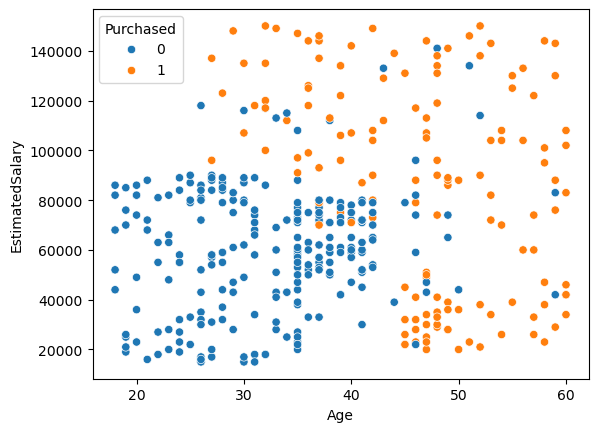

In [90]:
sns.scatterplot(data=dataset, x= "Age", y="EstimatedSalary", hue = "Purchased")
plt.show()

We can see that age and estimated salary have a huge difference so we want to do feature scaling.

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
sc.fit(x)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [93]:
# the created new DataFrame would not have any column name which is why we give them new column name and here we assigned it back to what the original x's colummn name were.
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the cu

In [97]:
dt.score(x_test, y_test)*100

83.75

In [98]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [99]:
# how many of my values marked correct were actually correct
precision_score(y_test, dt.predict(x_test))*100

77.77777777777779

In [100]:
# how many correct values did i catch
recall_score(y_test, dt.predict(x_test))*100

75.0

In [101]:
from sklearn.tree import plot_tree

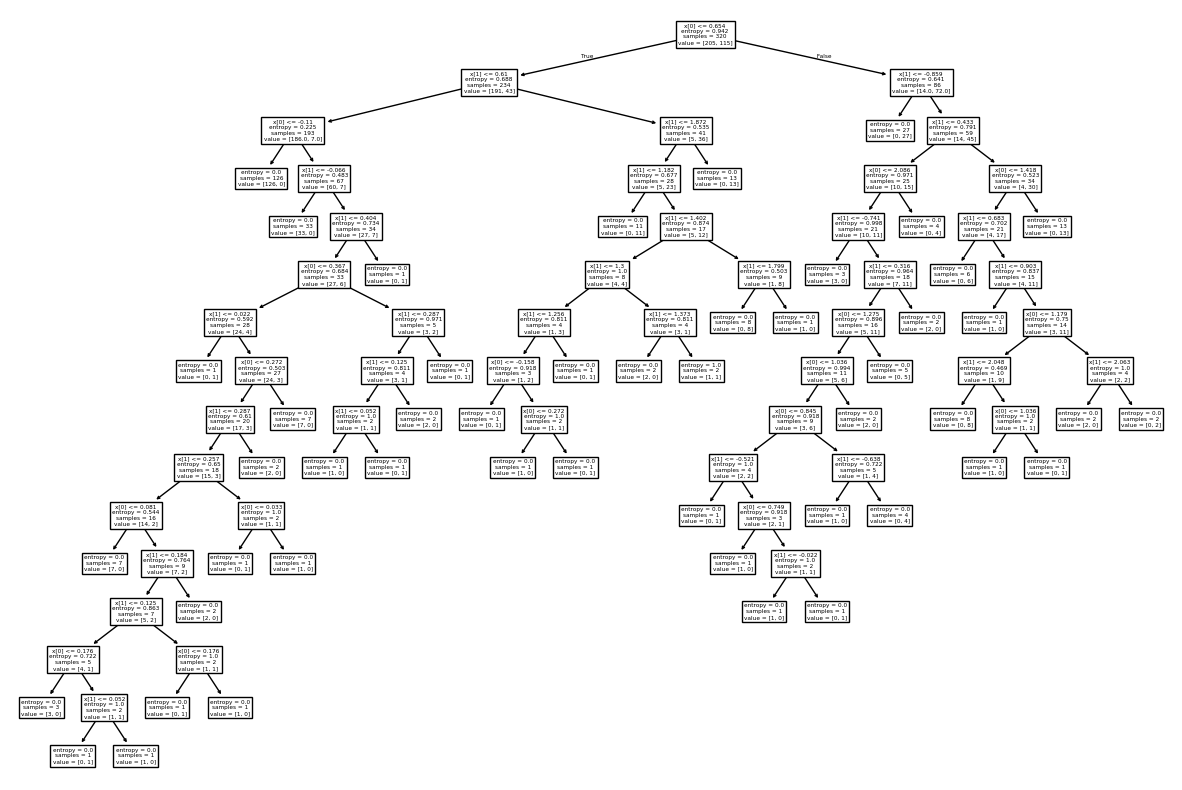

In [102]:
plt.figure(figsize=(15,10))
plot_tree(dt)
# plt.savefig("Data Science/Graphs/Decision Tree.jpg")
plt.show()

Looking at the graph, we can see:
1) It uses CART Algorithm that divides the graph using binary splitting.
2) The root node is split with Age attribute as it says x[0] i.e the first column.
3) The gini index might have been less than Salary.
4) total samples taken is 320 from splitting with Age
5) First kind of impurity value: 205
6) Second kind of impurity value: 115

In [103]:
x_train.shape

(320, 2)

We used both gini and entropy but we did not see any major difference but sometimes there might be major differences.

In [104]:
from mlxtend.plotting import plot_decision_regions

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


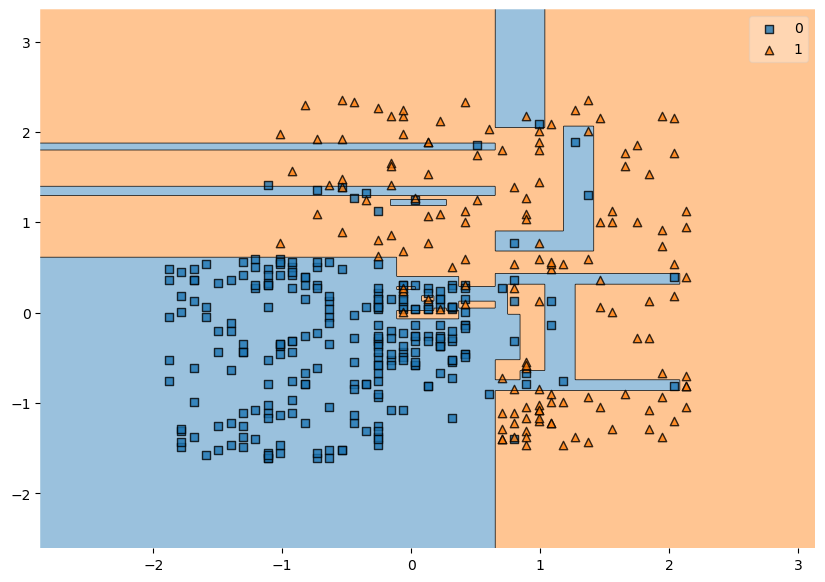

In [105]:
plt.figure(figsize=(10,7))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = dt)
plt.show()